# Análisis de aportaciones a candidatos a presidente

## Toma de datos

In [60]:
import numpy as np
import pandas as pd 
import sidetable
from pathlib import Path 
import qgrid
pd.options.display.float_format = '{:,.2f}'.format

In [20]:
ruta = Path.cwd() / '00 - datasets' / 'datasets' / 'fec' / 'P00000001-ALL.csv'
fec=pd.read_csv(ruta, low_memory=False)

In [3]:
fec.stb.freq(['cand_nm'])

,cand_nm,count,percent,cumulative_count,cumulative_percent
0,"Obama, Barack",593746,59.272000,593746,59.272000
1,"Paul, Ron",143757,14.350859,737503,73.622859
2,"Romney, Mitt",107229,10.704371,844732,84.327230
3,"Gingrich, Newt",47679,4.759661,892411,89.086891
4,"Santorum, Rick",46559,4.647855,938970,93.734745
5,"Cain, Herman",20107,2.007225,959077,95.741971
6,"Perry, Rick",13575,1.355154,972652,97.097125
7,"Bachmann, Michelle",13140,1.311729,985792,98.408854
8,"Roemer, Charles E. 'Buddy' III",5920,0.590977,991712,98.999831
9,"Pawlenty, Timothy",4555,0.454713,996267,99.454544


# ETL

In [4]:
# Extraigo candidatos únicos
candidatos = fec['cand_nm'].unique()
candidatos

array(['Bachmann, Michelle', 'Romney, Mitt', 'Obama, Barack',
       "Roemer, Charles E. 'Buddy' III", 'Pawlenty, Timothy',
       'Johnson, Gary Earl', 'Paul, Ron', 'Santorum, Rick',
       'Cain, Herman', 'Gingrich, Newt', 'McCotter, Thaddeus G',
       'Huntsman, Jon', 'Perry, Rick'], dtype=object)

In [21]:
# creo un diccionario de partidos
partidos = {x: 'Republican' for x in candidatos}
partidos['Obama, Barack'] = 'Democrat'
partidos

{'Bachmann, Michelle': 'Republican',
 'Romney, Mitt': 'Republican',
 'Obama, Barack': 'Democrat',
 "Roemer, Charles E. 'Buddy' III": 'Republican',
 'Pawlenty, Timothy': 'Republican',
 'Johnson, Gary Earl': 'Republican',
 'Paul, Ron': 'Republican',
 'Santorum, Rick': 'Republican',
 'Cain, Herman': 'Republican',
 'Gingrich, Newt': 'Republican',
 'McCotter, Thaddeus G': 'Republican',
 'Huntsman, Jon': 'Republican',
 'Perry, Rick': 'Republican'}

In [22]:
# Aplico map para obtener los partidos de los candidatos y genero salida
fec['party'] = fec['cand_nm'].map(partidos)
fec['party'].value_counts()

Democrat      593746
Republican    407985
Name: party, dtype: int64

In [7]:
# Detecto importes negativos en las contribuciones que debieramos filtrar
fec.stb.freq(['contb_receipt_amt'])

,contb_receipt_amt,count,percent,cumulative_count,cumulative_percent
0,100.0,178188,17.788009,178188,17.788009
1,50.0,137584,13.734625,315772,31.522634
2,25.0,110345,11.015432,426117,42.538067
3,250.0,91182,9.102444,517299,51.640510
4,500.0,57984,5.788380,575283,57.428891
...,...,...,...,...,...
8074,-5455.0,1,0.000100,1001727,99.999601
8075,-5500.0,1,0.000100,1001728,99.999701
8076,-7500.0,1,0.000100,1001729,99.999800
8077,-25800.0,1,0.000100,1001730,99.999900


In [8]:
# Centramos el analisis en Obama y Romney
fec.shape

(1001731, 17)

In [30]:
fec_obrm = fec.query('contb_receipt_amt > 0 and cand_nm=="Obama, Barack" or cand_nm=="Romney, Mitt"')
fec_obrm.shape

(696356, 17)

## Estadisticas por ocupación y empresa

In [10]:
fec_obrm.columns

Index(['cmte_id', 'cand_id', 'cand_nm', 'contbr_nm', 'contbr_city',
       'contbr_st', 'contbr_zip', 'contbr_employer', 'contbr_occupation',
       'contb_receipt_amt', 'contb_receipt_dt', 'receipt_desc', 'memo_cd',
       'memo_text', 'form_tp', 'file_num', 'party'],
      dtype='object')

In [85]:
fec_obrm['contbr_occupation'].value_counts().nlargest(20)

RETIRED                                   177652
ATTORNEY                                   30180
INFORMATION REQUESTED                      24747
HOMEMAKER                                  19710
PHYSICIAN                                  17235
INFORMATION REQUESTED PER BEST EFFORTS     12647
PROFESSOR                                  11805
TEACHER                                    11513
CONSULTANT                                 10079
NOT EMPLOYED                                9696
LAWYER                                      7438
ENGINEER                                    6112
PRESIDENT                                   4911
MANAGER                                     4753
WRITER                                      4442
SELF-EMPLOYED                               3780
SALES                                       3702
EXECUTIVE                                   3648
OWNER                                       3425
EDUCATOR                                    3360
Name: contbr_occupat

In [12]:
fec_obrm.contbr_occupation.value_counts()[:10]

RETIRED                                   177652
ATTORNEY                                   30180
INFORMATION REQUESTED                      24747
HOMEMAKER                                  19710
PHYSICIAN                                  17235
INFORMATION REQUESTED PER BEST EFFORTS     12647
PROFESSOR                                  11805
TEACHER                                    11513
CONSULTANT                                 10079
NOT EMPLOYED                                9696
Name: contbr_occupation, dtype: int64

In [13]:
fec_obrm.groupby(['contbr_occupation'])['contb_receipt_amt'].sum().sort_values(ascending=False)

contbr_occupation
RETIRED                                   36572065.61
ATTORNEY                                  16444561.79
HOMEMAKER                                 12286126.66
INFORMATION REQUESTED PER BEST EFFORTS    11173374.84
PHYSICIAN                                  5068121.28
                                             ...     
AFFORDABLE REAL ESTATE DEVELOPER                 3.00
LAN/WAN ANALYST                                  3.00
VICE PRESIDENT OF ADVANCEMENT/PHILANTH           0.00
MUSCULER THERAPIST                               0.00
SURGERY SCHEDULER                                0.00
Name: contb_receipt_amt, Length: 33603, dtype: float64

In [14]:
fec_obrm.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,party
411,C00431171,P80003353,"Romney, Mitt","ELDERBAUM, WILLIAM",DPO,AA,340230183,US GOVERNMENT,FOREIGN SERVICE OFFICER,25.0,01-FEB-12,NaN,NaN,NaN,SA17A,780124,Republican
412,C00431171,P80003353,"Romney, Mitt","ELDERBAUM, WILLIAM",DPO,AA,340230183,US GOVERNMENT,FOREIGN SERVICE OFFICER,110.0,01-FEB-12,NaN,NaN,NaN,SA17A,780124,Republican
413,C00431171,P80003353,"Romney, Mitt","CARLSEN, RICHARD",APO,AE,091280020,DEFENSE INTELLIGENCE AGENCY,INTELLIGENCE ANALYST,250.0,13-APR-12,NaN,NaN,NaN,SA17A,785689,Republican
414,C00431171,P80003353,"Romney, Mitt","DELUCA, PIERRE",APO,AE,091280005,CISCO,ENGINEER,30.0,21-AUG-11,NaN,NaN,NaN,SA17A,760261,Republican
415,C00431171,P80003353,"Romney, Mitt","SARGENT, MICHAEL",APO,AE,090120092,RAYTHEON TECHNICAL SERVICES CORP,COMPUTER SYSTEMS ENGINEER,100.0,07-MAR-12,NaN,NaN,NaN,SA17A,780128,Republican


In [27]:
por_ocupacion = fec_obrm.pivot_table(
    'contb_receipt_amt', index='contbr_occupation', columns='party', aggfunc='sum')
por_ocupacion.head()

party,Democrat,Republican
contbr_occupation,,
MIXED-MEDIA ARTIST / STORYTELLER,100.0,NaN
AREA VICE PRESIDENT,250.0,NaN
RESEARCH ASSOCIATE,100.0,NaN
TEACHER,500.0,NaN
THERAPIST,3900.0,NaN


In [28]:
por_ocupacion = por_ocupacion[por_ocupacion.sum(1) > 2000000]
por_ocupacion

party,Democrat,Republican
contbr_occupation,,
ATTORNEY,11126932.97,7.343540e+06
C.E.O.,1690.00,2.431528e+06
CEO,2069784.79,1.501157e+06
CONSULTANT,2459812.71,2.472815e+06
ENGINEER,950425.55,1.780102e+06
EXECUTIVE,1355161.05,3.918557e+06
HOMEMAKER,4243394.30,1.324141e+07
INFORMATION REQUESTED,4849801.96,3.892556e+06
INFORMATION REQUESTED PER BEST EFFORTS,NaN,1.585951e+07


In [1]:
por_ocupacion.plot.barh();

NameError: name 'por_ocupacion' is not defined

## Mayor y menor

In [41]:
def get_top_amounts(group, key, n=5):
    totals = group.groupby(key)['contb_receipt_amt'].sum()
    return totals.nlargest(n)

In [44]:
agrupado=fec_obrm.groupby('cand_nm')
agrupado.apply(get_top_amounts,'contbr_occupation', n=3)

cand_nm        contbr_occupation                     
Obama, Barack  RETIRED                                   25305116.38
               ATTORNEY                                  11141982.97
               INFORMATION REQUESTED                      4866973.96
Romney, Mitt   RETIRED                                   11266949.23
               INFORMATION REQUESTED PER BEST EFFORTS    11173374.84
               HOMEMAKER                                  8037250.86
Name: contb_receipt_amt, dtype: float64

# Etiquetado y segmentación

In [37]:
cubetas = [0] + [10**x for x in range(8)]
cubetas

[0, 1, 10, 100, 1000, 10000, 100000, 1000000, 10000000]

In [38]:
etiquetas = pd.cut(fec_obrm['contb_receipt_amt'], cubetas)
etiquetas

411         (10, 100]
412       (100, 1000]
413       (100, 1000]
414         (10, 100]
415         (10, 100]
             ...     
701381      (10, 100]
701382    (100, 1000]
701383        (1, 10]
701384      (10, 100]
701385    (100, 1000]
Name: contb_receipt_amt, Length: 696356, dtype: category
Categories (8, interval[int64]): [(0, 1] < (1, 10] < (10, 100] < (100, 1000] < (1000, 10000] < (10000, 100000] < (100000, 1000000] < (1000000, 10000000]]

In [46]:
agrupado = fec_obrm.groupby(['cand_nm', etiquetas])

In [49]:
agrupado.size().unstack(0)

cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",493,77
"(1, 10]",40070,3681
"(10, 100]",372280,31853
"(100, 1000]",153991,43357
"(1000, 10000]",22284,26186
"(10000, 100000]",2,1
"(100000, 1000000]",3,0
"(1000000, 10000000]",4,0


In [65]:
agrupado['contb_receipt_amt'].sum().unstack(0)

cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",318.24,77.00
"(1, 10]","337,267.62","29,819.66"
"(10, 100]","20,288,981.41","1,987,783.76"
"(100, 1000]","54,798,531.46","22,363,381.69"
"(1000, 10000]","51,753,705.67","63,942,145.42"
"(10000, 100000]","59,100.00","12,700.00"
"(100000, 1000000]","1,490,683.08",nan
"(1000000, 10000000]","7,148,839.76",nan


# Estadisticas por estado

<AxesSubplot:>

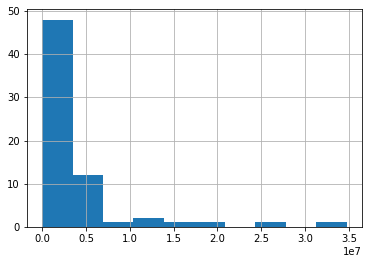

In [69]:
fec_obrm.groupby('contbr_st')['contb_receipt_amt'].sum().sort_values(ascending=False).hist()

In [78]:
fec_obrm.pivot_table(values='contb_receipt_amt', index='contbr_st',
                     columns='party', aggfunc='sum').sort_values(by='Democrat', ascending=False)

party,Democrat,Republican
contbr_st,,
CA,"23,824,984.24","10,908,232.46"
IL,"16,443,895.84","3,392,056.53"
NY,"14,651,918.51","9,800,175.75"
FL,"7,318,178.58","8,008,067.40"
MA,"6,649,015.25","4,533,351.34"
...,...,...
FM,600.00,nan
QU,500.00,nan
FF,nan,"99,030.00"
